In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('mean_pixel_dist_with_control.csv')

In [69]:
y1,y2,std1,std2 = df.y1.values, df.y2.values, df.std1.values, df.std2.values

In [70]:
from scipy.interpolate import interp1d
fy1 = interp1d(range(30), y1, kind='cubic')
fstd1 = interp1d(range(30), std1, kind='cubic')
fy2 = interp1d(range(30), y2, kind='cubic')
fstd2 = interp1d(range(30), std2, kind='cubic')

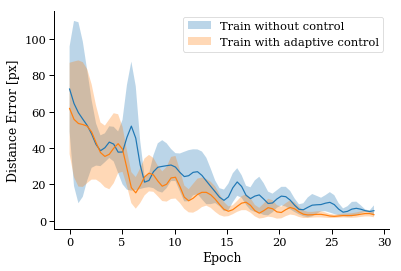

In [78]:
import seaborn as sns
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context("paper", font_scale=1.3)  

plt.figure()
ax = plt.gca()
ax.set_xlabel('Epoch')
ax.set_ylabel('Distance Error [px]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xnew = np.linspace(0,29,70)
plt.plot(xnew, fy1(xnew))
plt.fill_between(xnew, fy1(xnew)-fstd1(xnew), fy1(xnew)+fstd1(xnew), alpha=0.3, label='Train without control')
plt.plot(xnew, fy2(xnew))
plt.fill_between(xnew, fy2(xnew)-fstd2(xnew), fy2(xnew)+fstd2(xnew), alpha=0.3, label='Train with adaptive control')
plt.legend()
plt.savefig('control.pdf')